# k-Nearest Neighbors -- Codealong
----
In this notebook we will take a look at using the k-Nearest Neighbors algorithm as applied to a diabetes dataset. Let's import some libraries.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from scipy import stats

In [57]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
raw_df = pd.read_csv('diabetes.csv')

In [59]:
raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
raw_df.columns = raw_df.columns.map(lambda s: s.lower())
raw_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
raw_df = raw_df.rename(columns={
    'bloodpressure': 'blood_pressure',
    'skinthickness': 'skin_thickness',
    'diabetespedigreefunction': 'diabetes_pedigree_function'})

In [62]:
raw_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
X = raw_df.drop(columns=['outcome'])
y = raw_df.outcome

In [64]:
X.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [65]:
y.value_counts()

0    500
1    268
Name: outcome, dtype: int64

As noted, the classes here are slightly imbalanced.

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
pregnancies                   768 non-null int64
glucose                       768 non-null int64
blood_pressure                768 non-null int64
skin_thickness                768 non-null int64
insulin                       768 non-null int64
bmi                           768 non-null float64
diabetes_pedigree_function    768 non-null float64
age                           768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


There are no null values and all of the columns are successfully in numerical format.

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

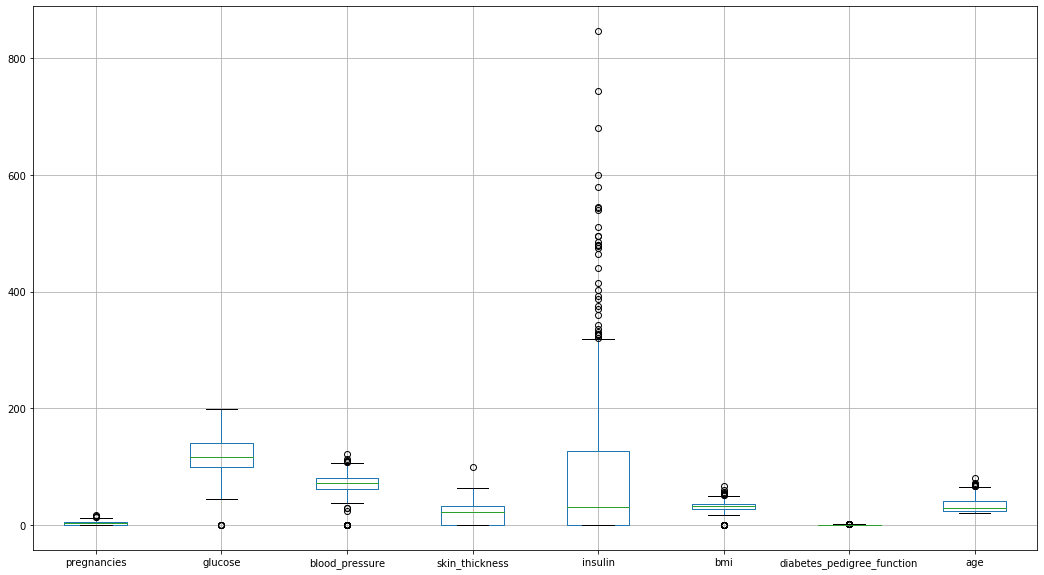

In [67]:
X.boxplot(figsize=(18,10))
plt.xticks()

In [68]:
scaler = StandardScaler()

In [69]:
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [70]:
X_norm.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


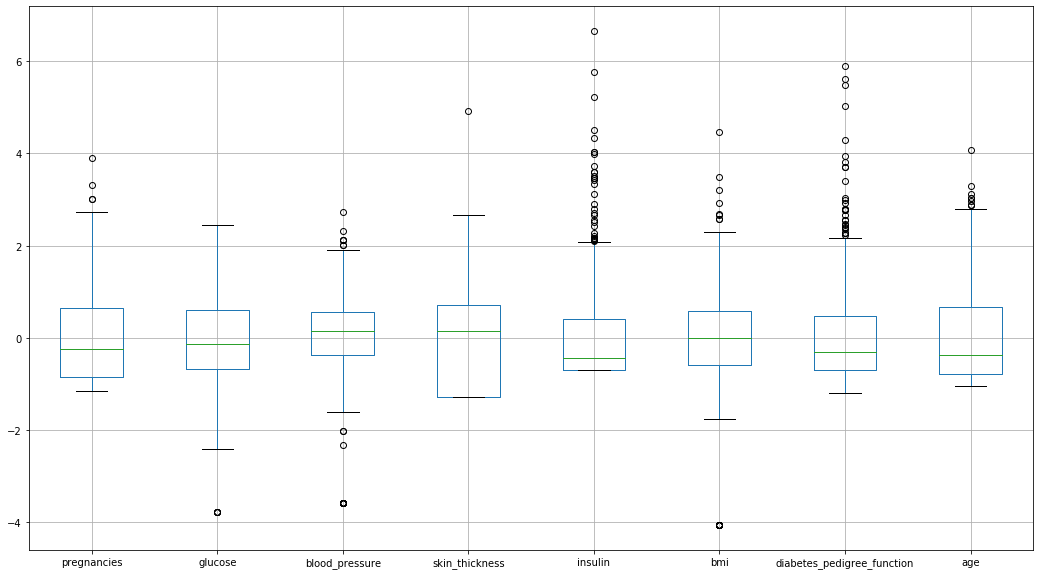

In [71]:
X_norm.boxplot(figsize=(18,10))

In [72]:
len(raw_df) - len(raw_df.drop_duplicates())

0

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
train_scaler = StandardScaler()

In [75]:
x_train_norm = train_scaler.fit_transform(x_train)

In [77]:
x_train_norm.shape

(576, 8)

In [81]:
x_train_norm_df = pd.DataFrame(x_train_norm, columns=x_train.columns)

In [82]:
x_test_norm = train_scaler.transform(x_test)
x_test_norm_df = pd.DataFrame(x_test_norm, columns=x_test.columns)

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)

In [86]:
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
preds = knn.predict(x_test_norm)

In [88]:
pred_proba = knn.predict_proba(x_test_norm)

In [89]:
accuracy_score(y_test, preds)

0.6822916666666666

In [91]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = {'n_neighbors': np.arange(2, 30, 1),
             'p': np.arange(1.0, 4.0, 0.2)}

knn_grid = GridSearchCV(knn, param_grid, n_jobs=-1, cv=5)

In [100]:
knn_grid.fit(x_train_norm, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
knn_grid.best_score_

0.7743055555555556

In [102]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9,
                     p=1.5999999999999999, weights='uniform')